# <font color = 'Blue'> Supervised ML: Using multiple algorithms to find out the best fitting model

## Imports

In [421]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [478]:
df = pd.read_csv('bank-additional-full.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## EDA

In [481]:
# Check the datatypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [483]:
df.shape

(41188, 21)

In [485]:
# check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [487]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [489]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [491]:
# Createa a subset data with no null values
df_subset = df.dropna(axis = 0).reset_index(drop = True)

In [493]:
# Convert target variable to binary values
df_subset['y'] = OneHotEncoder(drop='first').fit_transform(df_subset[['y']]).toarray()

In [495]:
# Converts categorical values into dummy or indicator values
df_subset = pd.get_dummies(df_subset,drop_first = True)

## 1. Decision Tree

In [498]:
y = df_subset['y']
X = df_subset.drop('y',axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [500]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)

In [502]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.896378
Precision: 0.539531
Recall: 0.536269
F1 Score: 0.537895


<Axes: >

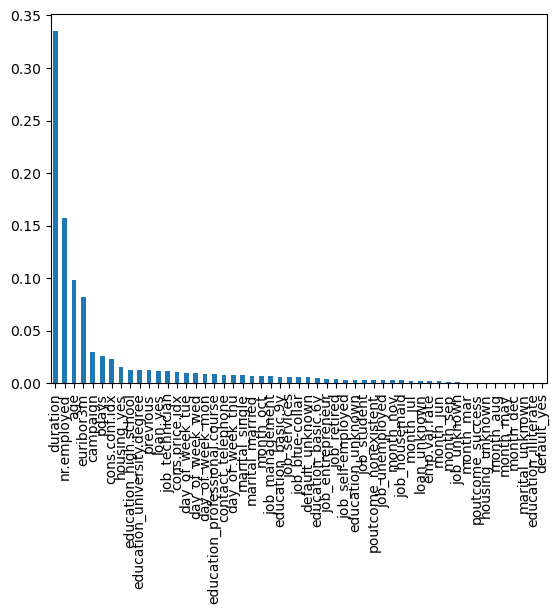

In [504]:
# Find out the most important features from the independant variables
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances,index=X.columns).sort_values(ascending=False)

fig,ax = plt.subplots()
forest_importances.plot.bar()

In [506]:
# Try the model with only the 3 most important features
y = df_subset['y']
X = df_subset[['duration','nr.employed','age']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [508]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train,y_train)
dt_pred = decision_tree.predict(X_test)

In [510]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.882296
Precision: 0.476804
Recall: 0.479275
F1 Score: 0.478036


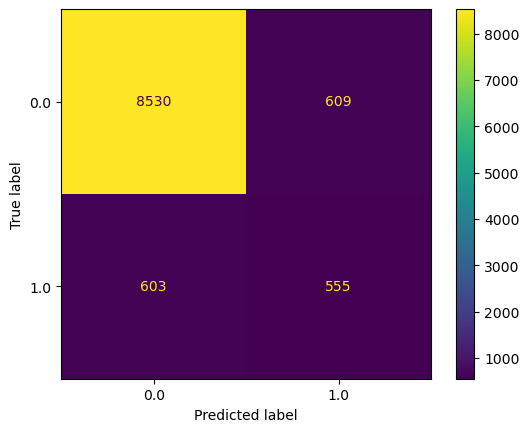

In [512]:
cm = metrics.confusion_matrix(y_test,dt_pred,labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = decision_tree.classes_)
disp.plot()

## 2. Logistic Regression

In [514]:
X = df_subset[['duration']]
y = df_subset['y']

In [516]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [518]:
clf = LogisticRegression().fit(X_train,y_train)

<Axes: xlabel='duration', ylabel='y'>

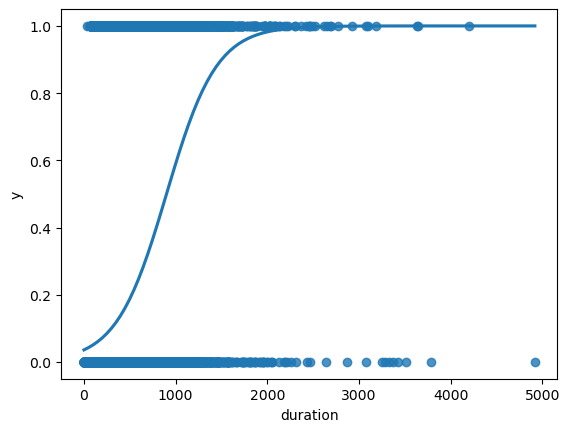

In [520]:
sns.regplot(x='duration', y='y', data=df_subset,logistic=True, ci=None)

In [522]:
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [524]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.895018
Precision: 0.619195
Recall: 0.172712
F1 Score: 0.270088


In [526]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      9139
         1.0       0.62      0.17      0.27      1158

    accuracy                           0.90     10297
   macro avg       0.76      0.58      0.61     10297
weighted avg       0.87      0.90      0.87     10297



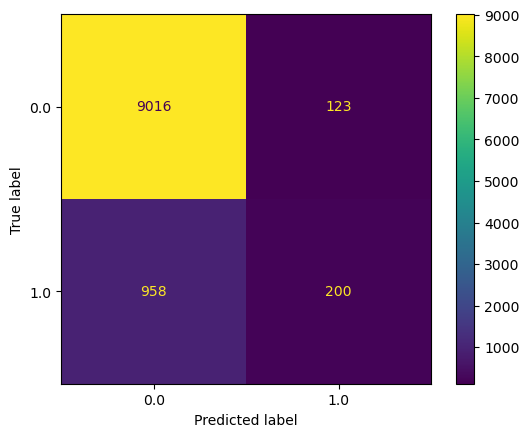

In [528]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =clf.classes_)
disp.plot()

## 3. Multiple Logistic Regression

In [530]:
X = df_subset[['duration','nr.employed','age']]
y = df_subset['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [532]:
clf = LogisticRegression().fit(X_train,y_train)

<Axes: xlabel='duration', ylabel='y'>

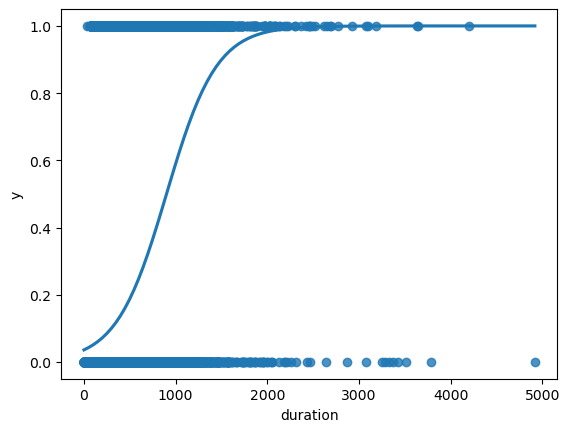

In [534]:
sns.regplot(x='duration', y='y', data=df_subset,logistic=True, ci=None)

In [536]:
y_pred = clf.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [538]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.907546
Precision: 0.667208
Recall: 0.354922
F1 Score: 0.463360


In [540]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9139
         1.0       0.67      0.35      0.46      1158

    accuracy                           0.91     10297
   macro avg       0.80      0.67      0.71     10297
weighted avg       0.89      0.91      0.89     10297



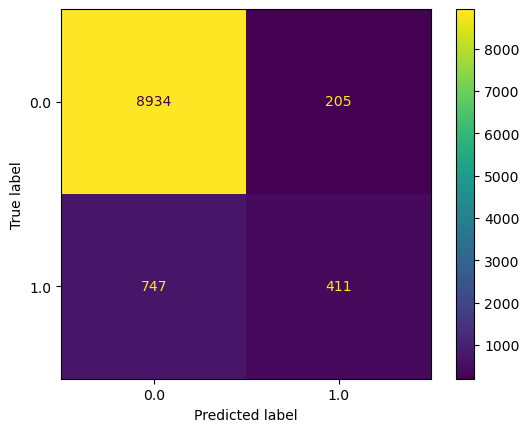

In [542]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =clf.classes_)
disp.plot()

## 4. SVM

In [323]:
from sklearn.svm import SVC

In [325]:
X = df_subset[['duration','nr.employed','age']]
y = df_subset['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [327]:
svm = SVC(kernel='linear')

In [329]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [331]:
svm.score(X_test,y_test)

0.9026901039137613

In [333]:
y_pred = svm.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [335]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.902690
Precision: 0.676471
Recall: 0.258204
F1 Score: 0.373750


In [337]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      9139
         1.0       0.68      0.26      0.37      1158

    accuracy                           0.90     10297
   macro avg       0.79      0.62      0.66     10297
weighted avg       0.89      0.90      0.88     10297



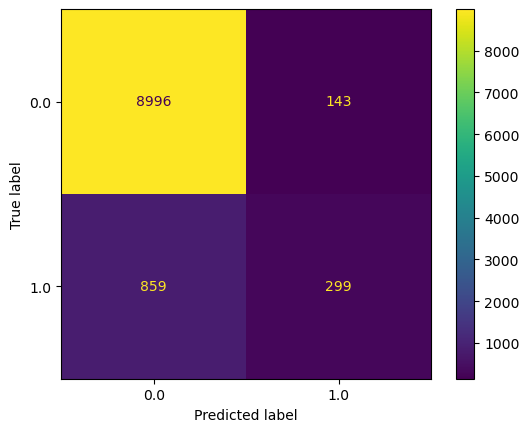

In [339]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = svm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =svm.classes_)
disp.plot()

## 5.KNN

In [188]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [544]:
# create a dataframe with the neccessary variables
features = pd.DataFrame(df_subset[['duration','age','nr.employed','y']])

In [548]:
features.head()

,duration,age,nr.employed,y
0,261,56,5191.0,0.0
1,149,57,5191.0,0.0
2,226,37,5191.0,0.0
3,151,40,5191.0,0.0
4,307,56,5191.0,0.0


In [550]:
scaler = StandardScaler()

In [554]:
# Scale the independant features or independant variables
scaler.fit(features.drop('y',axis=1))

StandardScaler()

In [556]:
# Normalize the independant variables by using transform from standardscaler fxn
scaled_features = scaler.transform(features.drop('y',axis=1))
scaled_features

array([[ 0.01047142,  1.53303429,  0.33167991],
       [-0.42150051,  1.62899323,  0.33167991],
       [-0.12451981, -0.29018564,  0.33167991],
       ...,
       [-0.26722482,  1.53303429, -2.8156966 ],
       [ 0.70856893,  0.38152696, -2.8156966 ],
       [-0.07438021,  3.26029527, -2.8156966 ]])

In [558]:
features.columns[:-1]

Index(['duration', 'age', 'nr.employed'], dtype='object')

In [562]:
df_features = pd.DataFrame(scaled_features,columns=features.columns[:-1])
df_features

,duration,age,nr.employed
0,0.010471,1.533034,0.331680
1,-0.421501,1.628993,0.331680
2,-0.124520,-0.290186,0.331680
3,-0.413787,-0.002309,0.331680
4,0.187888,1.533034,0.331680
...,...,...,...
41183,0.292025,3.164336,-2.815697
41184,0.481012,0.573445,-2.815697
41185,-0.267225,1.533034,-2.815697
41186,0.708569,0.381527,-2.815697


In [572]:
X = scaled_features # independant variables or features
y = features['y']   # dependant variable or the outcome

In [574]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [590]:
# Apply KNN with chosing one one neighbor to classify the output
knn = KNeighborsClassifier(n_neighbors=1)

In [592]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [594]:
y_pred = knn.predict(X_test)
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [596]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.881616
Precision: 0.473547
Recall: 0.471503
F1 Score: 0.472523


In [598]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      9139
         1.0       0.47      0.47      0.47      1158

    accuracy                           0.88     10297
   macro avg       0.70      0.70      0.70     10297
weighted avg       0.88      0.88      0.88     10297



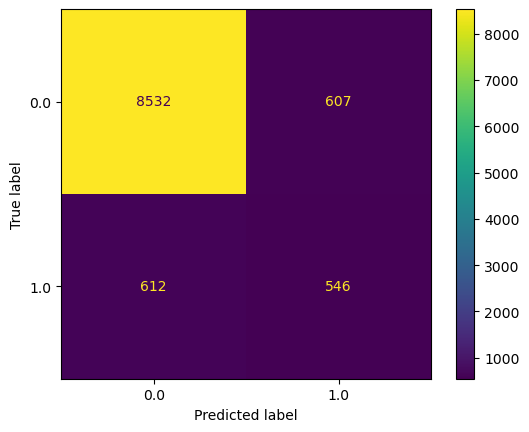

In [600]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =knn.classes_)
disp.plot()

#### Choosing K value

In [610]:
# find the error where predicted values doesnt match the tested value from 1 to 40  and store the mean of two in error_rate array 
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

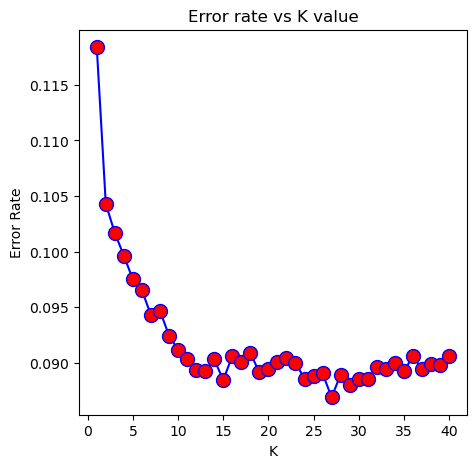

In [614]:
plt.figure(figsize=(5,5))
plt.plot(range(1,41),error_rate,color='b',linestyle='-',marker='o',markerfacecolor='r',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [616]:
# With updated K value to 27
knn = KNeighborsClassifier(n_neighbors=27)

In [618]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [620]:
y_pred = knn.predict(X_test)

In [621]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.913081
Precision: 0.647587
Recall: 0.498273
F1 Score: 0.563202


In [624]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      9139
         1.0       0.65      0.50      0.56      1158

    accuracy                           0.91     10297
   macro avg       0.79      0.73      0.76     10297
weighted avg       0.91      0.91      0.91     10297



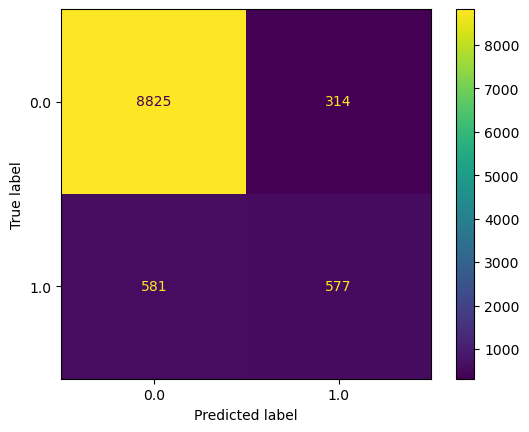

In [626]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels =knn.classes_)
disp.plot()

# Conclusions: The most accurate model was KNN 